In [1]:
from skimage import io,transform
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import heatmap

# Part a

In [2]:
print('importing test images')
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/inputs/P4/test2/'
test = []
gender = ['M', 'W']
for gen in gender:
    for i in range(1,10):
        testlist=[]
        for j in range(14,21):
            img = io.imread(path + gen+"-00"+ str(i)+"-"+str(j)+ ".bmp")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            fft_img = np.fft.fft2(img)
            fft_img = fft_img.ravel()
            testlist.append(fft_img)
        test.append(np.array(testlist))
    for i in range(10,51):
        testlist=[]
        for j in range(14,21):
            img = io.imread(path + gen+"-0"+ str(i)+"-"+str(j)+ ".bmp")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            fft_img = np.fft.fft2(img)
            fft_img = fft_img.ravel()
            testlist.append(fft_img)
        test.append(np.array(testlist))
m,n = img.shape[0],img.shape[1]

importing test images


In [3]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P4/'
filters = []
for p in range(100):
    filters.append(np.array(pd.read_csv(path+'a_mace_filters_csv/hfilter'+str(p)+'.csv',header=None), dtype=complex))

Identified


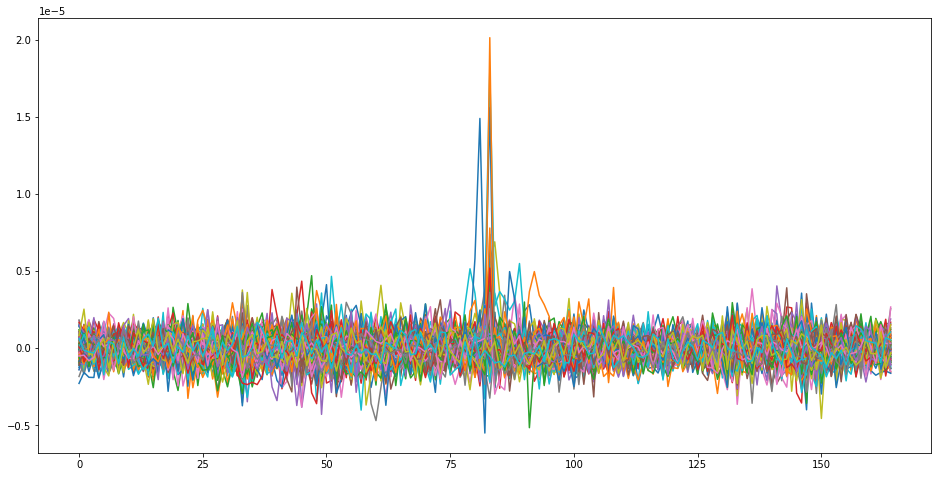

In [4]:
fig = plt.figure(figsize=(16,8))
test_img = test[1][1].reshape((m,n))
output=np.real(np.fft.ifft2(test_img*np.conj(filters[1])))
output=np.fft.ifftshift(output)
maximum = np.max(output.ravel())
maximum = np.max(output[(m//2)-20:(m//2)+20,(n//2)-20:(n//2)+20].ravel())
peak = np.where(output==maximum)
miu = np.mean(output[peak[0][0]-20: peak[0][0]+20,peak[1][0]-20: peak[1][0]+20])
sigma = np.std(output[peak[0][0]-20: peak[0][0]+20,peak[1][0]-20: peak[1][0]+20])
if (maximum-miu)/sigma >8:
    print('Identified')
for i in range(output.shape[1]):
    plt.plot(output[:,i])
#plt.savefig('F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P4/a_random test/random_test_class.jpg')
plt.show()

# Part b

In [5]:
recognition_mat = np.zeros((100,7))
for i in range(100):
    fig = plt.figure(figsize=(40,40))
    for j in range(7):
        test_img = test[i][j].reshape((m,n))
        output=np.real(np.fft.ifft2(test_img*np.conj(filters[i])))
        output=np.fft.ifftshift(output)
        maximum = np.max(output[(m//2)-20:(m//2)+20,(n//2)-20:(n//2)+20].ravel())
        peak = np.where(output==maximum)
        miu = np.mean(output[peak[0][0]-20: peak[0][0]+20,peak[1][0]-20: peak[1][0]+20])
        sigma = np.std(output[peak[0][0]-20: peak[0][0]+20,peak[1][0]-20: peak[1][0]+20])
        if (maximum-miu)/sigma >8:
            recognition_mat[i,j]=1
        plt.subplot(4,2,j+1)
        for k in range(output.shape[1]):
            plt.plot(output[:,k])
        plt.title('test '+str(j))
    #plt.savefig('F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P4/b_test outputs/class'+str(i)+'.jpg')
    plt.close(fig)

In [6]:
print('Recognition Rate: ', np.sum(recognition_mat)/700)

Recognition Rate:  0.71


In [7]:
final_recognition_table = np.append(recognition_mat*100, np.expand_dims(np.sum(recognition_mat, axis=1)/7*100, axis=-1), axis=-1)

In [9]:
final_recognition_table = pd.DataFrame(final_recognition_table)

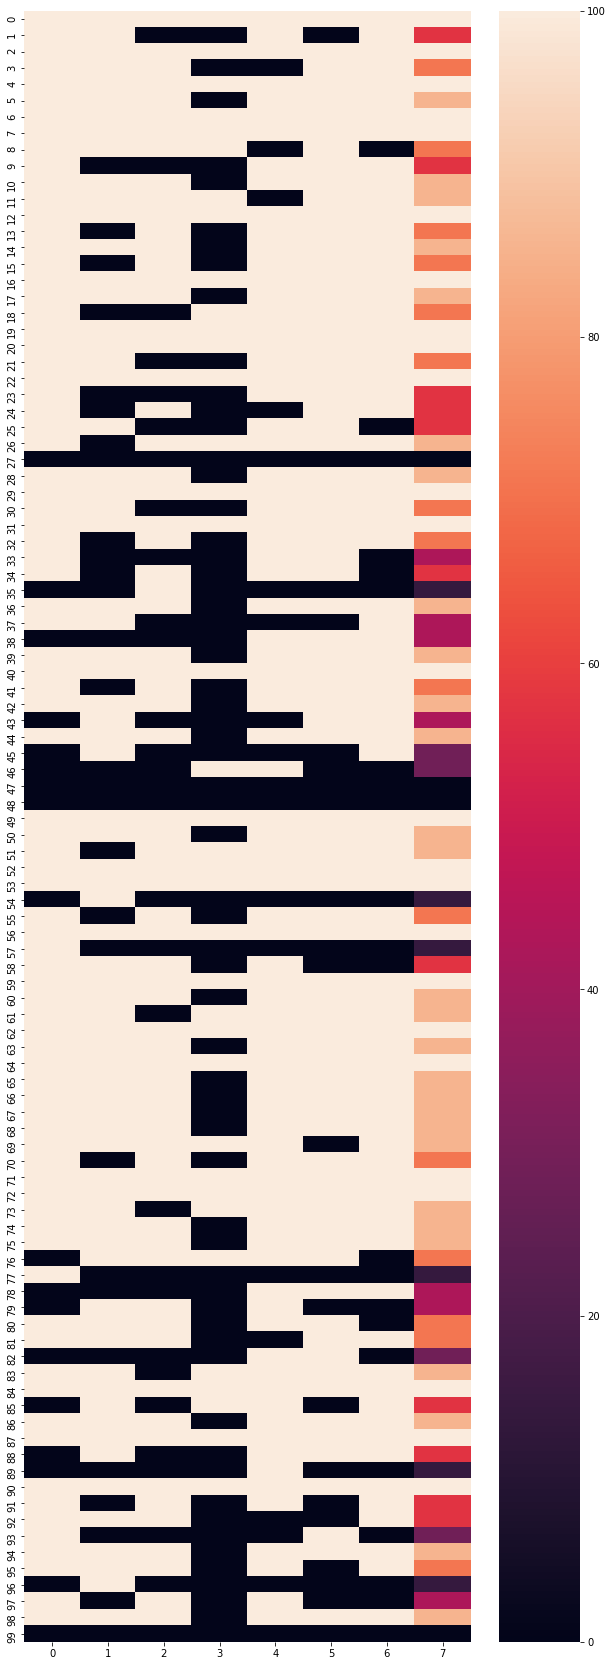

In [10]:
plt.figure(figsize=(10,30))
heatmap(final_recognition_table)
plt.savefig('F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P4/b_test outputs/recognition table.jpg')